In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from os.path import exists
from read_roi import read_roi_zip
import seaborn as sns
from scipy.optimize import curve_fit
import matplotlib.pyplot

 
def polynomial(x, a, b, c):
    return a * x + b * x**2 + c

def distance(x, y, x0, y0):
    """
    Return distance between point'
    P[x0,y0] and a curve (x,y)'
    """
    d_x = x - x0
    d_y = y - y0
    dis = np.sqrt( d_x**2 + d_y**2 )
    return dis

def min_distance(x, y, P, precision=5):
    """
    Compute minimum/a distance/s between
    a point P[x0,y0] and a curve (x,y)
    rounded at `precision`.
    
    ARGS:
        x, y      (array)
        P         (tuple)
        precision (int)
        
    Returns min indexes and distances array.
    """
    # compute distance
    d = distance(x, y, P[0], P[1])
    d = np.round(d, precision)
    # find the minima
    glob_min_idxs = np.argwhere(d==np.min(d)).ravel()
    return glob_min_idxs, d
    
# Dies sind die Parameter, damit der Fit der unterschiedlichen Ausrichtungen sinnvoll wird
fit_bounds = {"1": ([0,-0.001,-np.inf],[3,0.001,np.inf]),
             "2": ([0,-0.001,-np.inf],[2,0.01,np.inf]),
             "3":([-2,-0.001,-np.inf],[2,0.01,np.inf]),
             "4": ([-3,-0.01,-np.inf],[3,0.00,np.inf]),
             "6": ([0.5,-0.01,-np.inf],[1.5,0.01,811]),
             "7": ([-2,0,-np.inf],[2,0.01,np.inf]),
             "8": ([-2,-0.001,-np.inf],[0,0.01,np.inf]),
             "9": ([-2,-0.001,-np.inf],[2,0.01,np.inf])}

In [3]:
# Read the file with the infromation about the ROIs
rec_list = pd.read_excel("ttap2_recordings_rois_cortex_pos_20240110.xlsx")

# Read the activity data
rec_data = pd.read_csv("ttap2_rel_activity_freq.csv")

# Extract the number of each cell after "Mean" (e.g. "Mean12" -> 12) into its own column
rec_data["cell_no"] = rec_data.cell.str[4:]
rec_data["cell_no"] = rec_data["cell_no"].astype("int")
rec_data["cell_no"] = rec_data["cell_no"]-1 

In [4]:
rec_data.head()

,Unnamed: 0,animal,birthdate,genotype,recording,start,cell,dt,end,n_cells,...,activity_pos2,freq_pos2,perf_change,sex,freq_exist,count,rel_activity,rel_intraburst_freq,rel_freq_pos1,cell_no
0,0,114001,2022-10-01,wt,230223_slice05_500pM_AngII_ctrl_results.ome.csv,0,Mean1,0.1,4450,28,...,NaN,NaN,NaN,NaN,1.0,21,0.880816,0.954554,0.954554,0
1,1,114001,2022-10-01,wt,230223_slice05_500pM_AngII_ctrl_results.ome.csv,0,Mean10,0.1,4450,28,...,NaN,NaN,NaN,NaN,1.0,21,0.920853,0.699484,0.699484,9
2,2,114001,2022-10-01,wt,230223_slice05_500pM_AngII_ctrl_results.ome.csv,0,Mean11,0.1,4450,28,...,NaN,NaN,NaN,NaN,1.0,21,0.800741,0.872039,0.872039,10
3,3,114001,2022-10-01,wt,230223_slice05_500pM_AngII_ctrl_results.ome.csv,0,Mean12,0.1,4450,28,...,NaN,NaN,NaN,NaN,1.0,21,0.880816,0.990691,0.990691,11
4,4,114001,2022-10-01,wt,230223_slice05_500pM_AngII_ctrl_results.ome.csv,0,Mean13,0.1,4450,28,...,NaN,NaN,NaN,NaN,1.0,21,0.640593,1.015434,1.015434,12


201105_slice03_rec02_RoiSet.zip


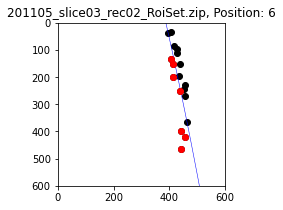

210323_s1r1_RoiSet.zip


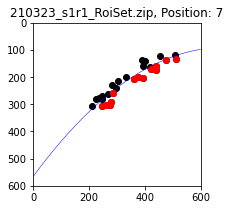

210323_s2r1_RoiSet.zip


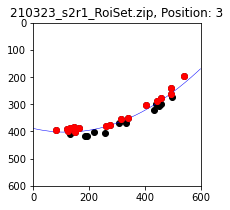

210323_s4r1_RoiSet.zip


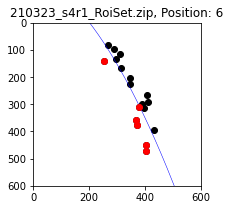

210324_s3r1_RoiSet.zip


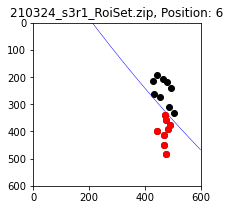

210324_s4r1_RoiSet.zip


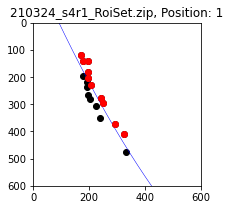

210331_s1r1_RoiSet.zip


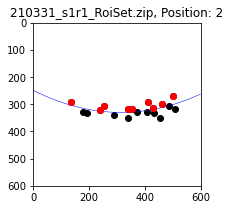

210331_s3r1_RoiSet.zip


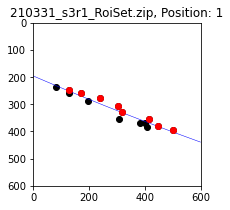

210407_s3r1_RoiSet.zip


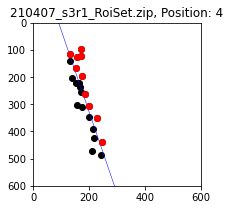

210407_s5r1_RoiSet.zip


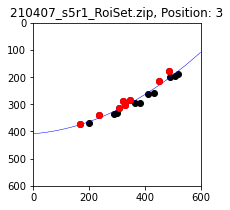

210408_s2r1_RoiSet.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


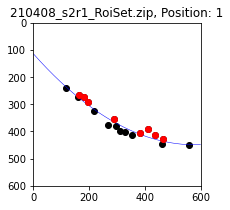

210408_s5r1_RoiSet.zip


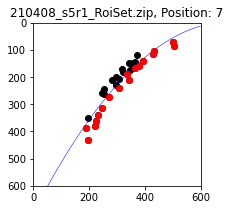

210413_s1r1_RoiSet.zip


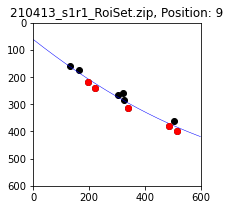

210413_s3r1_RoiSet.zip


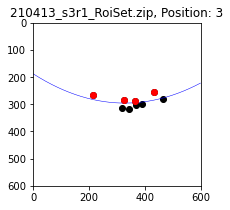

210413_s4r1_RoiSet.zip


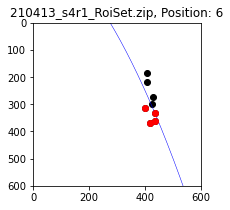

210415_s1r1_RoiSet.zip


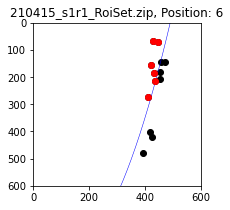

210415_s3r1_RoiSet.zip


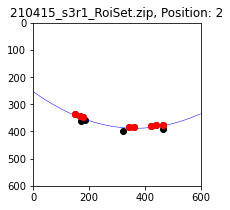

210415_s5r1_RoiSet.zip


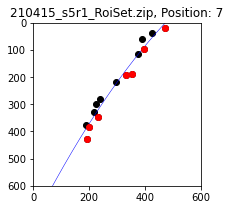

210421_s1r1_RoiSet.zip


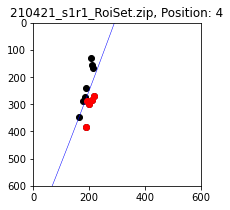

210421_s2r1_RoiSet.zip


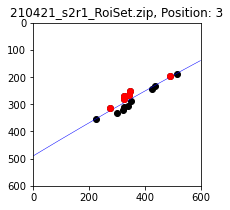

210421_s3r1_RoiSet.zip


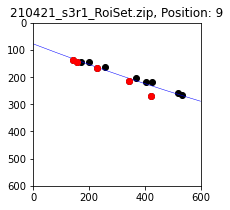

210421_s4r1_RoiSet.zip


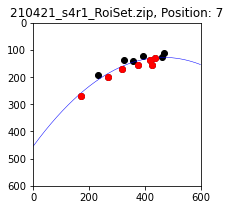

210421_s5r1_RoiSet.zip


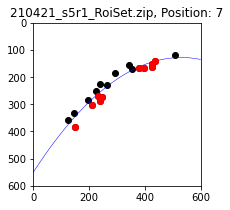

210604_slice01_rec02_RoiSet.zip


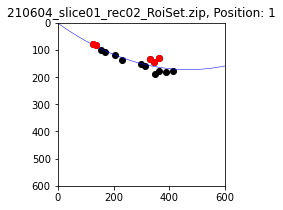

210622_slice04_rec01_1_RoiSet.zip


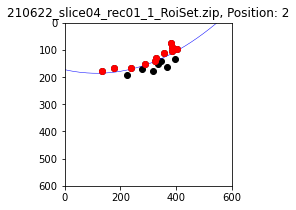

210917_slice01_rec01_TTAP2_RoiSet.zip


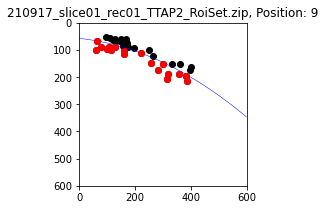

211206_slice02_rec01_TTAP2_RoiSet.zip


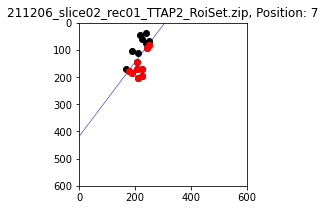

211213_slice04_rec01_TTAP2_RoiSet.zip


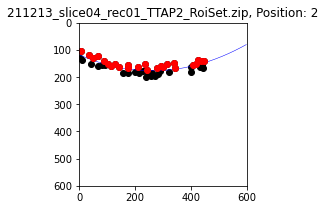

211214_slice04_rec01_ctrl_RoiSet.zip


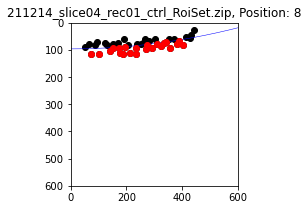

220128_slice05_rec01_ctrl_RoiSet.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


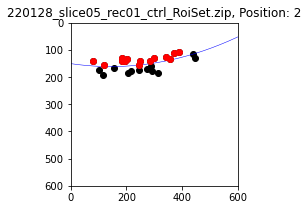

220211_slice05_rec01_ctrl_RoiSet.zip


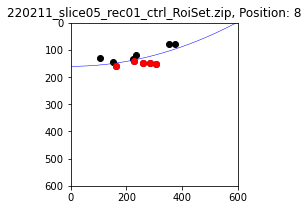

220217_slice01_rec01_ctrl_RoiSet.zip


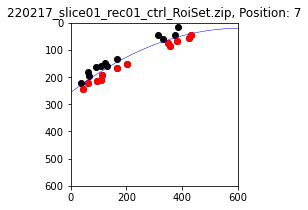

220406_slice03_rec01_TTAP2_roiset.zip


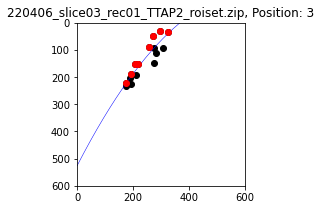

220406_slice04_rec01_TTAP2_roiset.zip


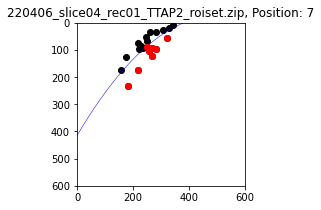

220407_slice01_rec01_ctrl_untitled_roiset.zip


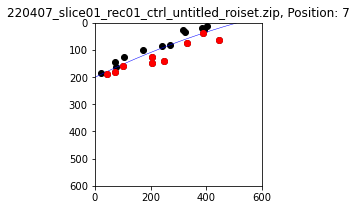

220407_slice02_rec01_TTAP2_roiset.zip


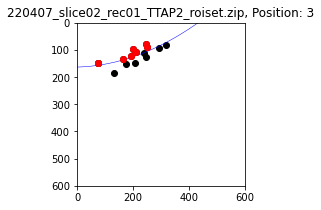

220408_slice04_rec01_TTAP2_1_roiset.zip


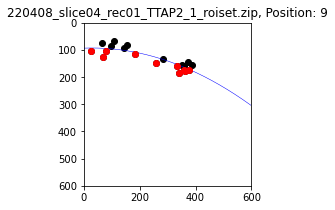

220601_slice03_rec01_ctrl_dp_driftcorr.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


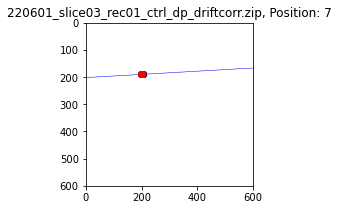

220603_slice03_rec01_ctrl_dp_roiset.zip


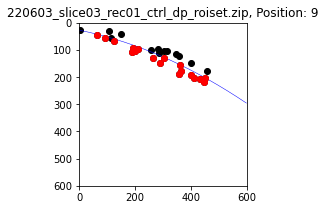

220607_slice03_rec01_ctrl_dp_roiset.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


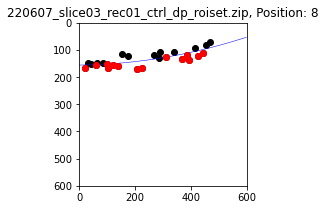

220610_slice03_rec01_ctrl_dp_roiset.zip


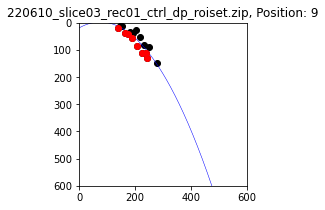

230223_slice05_500pM_AngII_ctrl_roiset.ome.zip


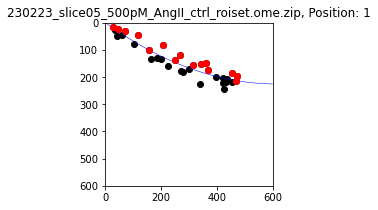

230224_slice02_500pM_AngII_ctrl_roiset.zip


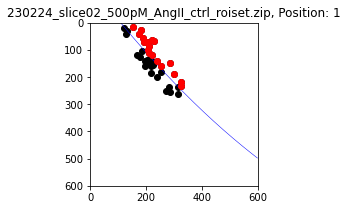

230224_slice03_500pM_AngII_ctrl_roiset.zip


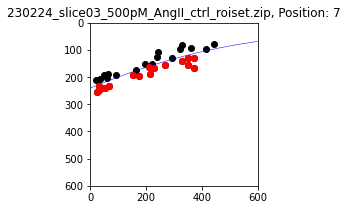

230227_slice01_500pM_AngII_ctrl_roiset.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


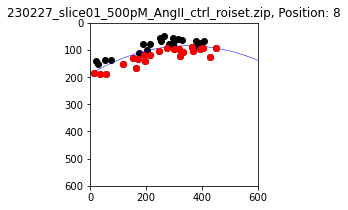

230228_slice01_500pM_AngII_ctrl_roiset.zip


<ipython-input-5-c9cac60c151e>:96: RuntimeWarning: invalid value encountered in true_divide
  side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)


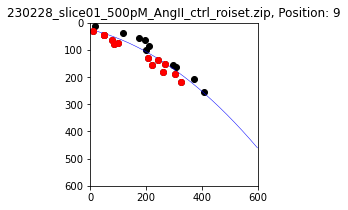

230302_slice03_500pM_AngII_ctrl_roiset.zip


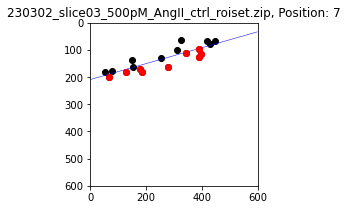

230302_slice06_500pM_AngII_ctrl_roiset.zip


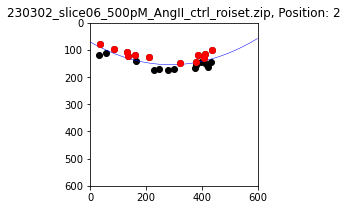

In [5]:
full_roi_data = pd.DataFrame([]) # This data will contain the whole dataset at the end

# Iterate over all ROI files
for roi_file in rec_list.rois.unique():
    print(roi_file)
    if roi_file != np.nan: # Check if entry exists
        if exists(roi_file): # Check if file exists
            
            rois = read_roi_zip(roi_file) # Read the ROI file
            direction = int(rec_list[rec_list.rois==roi_file].cortex_position.values[0]) # Get the direction
            
            rec_file = rec_list[rec_list.rois==roi_file].recording.unique()[0] # Get the information for this ROI
            
            # Load the metadata for the recording itself
            rec = rec_data[rec_data.recording==rec_file]
            cells_for_analysis = list(rec[(rec.pos==1)].cell_no.values)
            genotype = rec.genotype.unique()[0]
            control = rec.control.unique()[0]

            plt.figure(figsize=(3,3)) # Create a figure

            # This dictionary will contain all necessary data about each cell
            roi_positions = {"x":[], "y":[], "closest_x":[], "closest_y":[], 
                             "distance":[], "use":[], "roi_file":[], "genotype": [], "activity1": [],
                            "activity2": [], "frequency1": [], "frequency2" : [], "control": [], "active_under_ttap2": []}
            # Iterate over the individual ROIs
            # This will only properly work if the cell number corresponds to the order of the ROIs as read from the file
            for i, roi in enumerate(rois):
                plt.title(f"{roi_file}, Position: {direction}")
                plt.plot(np.mean(rois[roi]["x"]), np.mean(rois[roi]["y"]), "ko") # Plot all mean ROI positions
                
                # Add mean x and y positions (simple mean over all values, take care if cells are not roundish)
                roi_positions["x"].append(np.mean(rois[roi]["x"]))
                roi_positions["y"].append(np.mean(rois[roi]["y"]))
                roi_positions["roi_file"].append(roi_file) # Add the name of the ROI file
                roi_positions["genotype"].append(genotype) # Add the genotype
                
                # Assign control status              
                if control=="y":
                    roi_positions["control"].append(True)
                else:
                    roi_positions["control"].append(False)
                
                # Iterate over those cells that are included in the analysi
                if i in cells_for_analysis:
                    roi_positions["use"].append(True)
                    
                    # Add the activities and intraburst frequencies
                    roi_positions["activity1"].append(rec[(rec.pos==1)&(rec.cell_no==i)].activity.values[0])
                    activity2 = rec[(rec.pos==2)&(rec.cell_no==i)].activity.values[0]
                    roi_positions["activity2"].append(activity2)
                    roi_positions["frequency1"].append(rec[(rec.pos==1)&(rec.cell_no==i)].intraburst_freq.values[0])
                    roi_positions["frequency2"].append(rec[(rec.pos==2)&(rec.cell_no==i)].intraburst_freq.values[0])
                    
                    # add a special flag if the activity in the 2nd segment is below 0.17
                    if activity2 < 0.17:
                        roi_positions["active_under_ttap2"].append(False)
                    else:
                        roi_positions["active_under_ttap2"].append(True)                        

                else:
                    roi_positions["use"].append(False)
                    roi_positions["activity1"].append(-1)
                    roi_positions["activity2"].append(-1)
                    roi_positions["active_under_ttap2"].append(False)
                    roi_positions["frequency1"].append(-1)
                    roi_positions["frequency2"].append(-1)

            
            
            # Polynomial
            popt, pcov = curve_fit(polynomial, roi_positions["x"], roi_positions["y"],
                               bounds=fit_bounds[str(direction)])
            a, b, c = popt
            x_polynomial = np.arange(0,600)
            y_polynomial = polynomial(x_polynomial, a, b,c )
            
            
            for i, x in enumerate(roi_positions["x"]):
                
                P = (x, roi_positions["y"][i])
                min_index, d = min_distance(x_polynomial, y_polynomial, P)
                roi_positions["closest_x"].append(x_polynomial[min_index][0])
                roi_positions["closest_y"].append(y_polynomial[min_index][0])
                roi_positions["distance"].append(d[min_index][0])

                
            plt.plot(x_polynomial, y_polynomial, "b", lw=0.5)
            
            # determine which side of the fit the points lie on for y:
            side_of_fit_y = np.array(roi_positions["y"])-np.array(roi_positions["closest_y"])
            side_of_fit_y = side_of_fit_y/np.abs(side_of_fit_y)
            
            # ...and for x:
            side_of_fit_x = np.array(roi_positions["x"])-np.array(roi_positions["closest_x"])
            side_of_fit_x = side_of_fit_x/np.abs(side_of_fit_x)
            
            if (direction==7) or (direction==8) or (direction==9):
                roi_positions["distance"] =  np.array(roi_positions["distance"])*(-side_of_fit_y)
            elif (direction==1) or (direction==2) or (direction==3):
                roi_positions["distance"] =  np.array(roi_positions["distance"])*(side_of_fit_y)
            elif (direction==4):
                roi_positions["distance"] =  np.array(roi_positions["distance"])*(-side_of_fit_x)
            elif (direction==6):
                roi_positions["distance"] =  np.array(roi_positions["distance"])*(side_of_fit_x)    
            
            plt.plot(np.array(roi_positions["x"])[roi_positions["distance"]<0], np.array(roi_positions["y"])[roi_positions["distance"]<0], "ro")

            
           
            plt.xlim(0,600)
            plt.ylim(0,600)
            plt.gca().invert_yaxis()
            plt.show()
            full_roi_data = pd.concat([full_roi_data, pd.DataFrame(roi_positions)], axis=0)
        else:
            print(roi_file, "doesn't exist")

Text(0.5, 0, 'Distance')

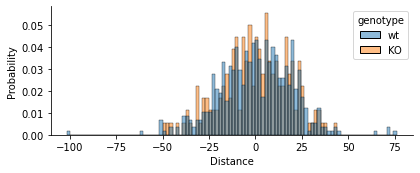

In [7]:
# Histogram over all cells (controls + non-controls) that are marked for use
cm = 1/2.54
fig1, ax1 = plt.subplots(figsize=(16.5*cm,6*cm))

sns.histplot(data=full_roi_data[full_roi_data.use==True],\
             x="distance", hue="genotype", stat="probability",\
             common_norm=False, bins=100)
sns.despine(top=True, right=True)
ax1.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75])
ax1.set_xlabel("Distance")

(-105.0, 90.0)

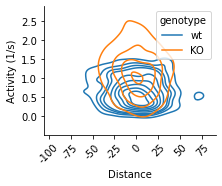

In [8]:
fig1, ax1 = plt.subplots(figsize=(7.8*cm,6*cm))
sns.kdeplot(data=full_roi_data[(full_roi_data.use==True)], x="distance", y="activity1", hue="genotype", levels=10)
sns.despine(top=True, right=True)
ax1.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75])
ax1.set_yticks([0,0.5, 1,1.5,2,2.5])
ax1.set_xlabel("Distance")  
ax1.set_ylabel("Activity (1/s)")  

ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
ax1.set_ylim(-0.5,2.9)
ax1.set_xlim(-105,90)

(-105.0, 90.0)

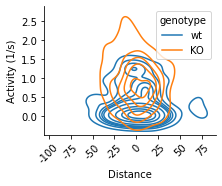

In [9]:
fig1, ax1 = plt.subplots(figsize=(7.8*cm,6*cm))

sns.kdeplot(data=full_roi_data[(full_roi_data.use==True)&(full_roi_data.control==False)],\
            x="distance", y="activity2", hue="genotype", levels=10)

sns.despine(top=True, right=True)
ax1.set_xticks([-100, -75, -50, -25, 0, 25, 50, 75])
ax1.set_yticks([0,0.5, 1,1.5,2,2.5])
ax1.set_xlabel("Distance")  
ax1.set_ylabel("Activity (1/s)")  

ax1.set_xticklabels(ax1.get_xticks(), rotation = 45)
ax1.set_ylim(-0.5,2.9)
ax1.set_xlim(-105,90)